In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cape town za
sitka us
ponta do sol cv
the valley ai
yellowknife ca
moose factory ca
klaeng th
tual id
nome us
norman wells ca
tuktoyaktuk ca
mys shmidta ru
lata sb
barrow us
jamestown sh
kurilsk ru
barrow us
tasiilaq gl
kavieng pg
taolanaro mg
kapaa us
belushya guba ru
aban ru
kapaa us
hong gai vn
albany au
new norfolk au
nikolskoye ru
schwandorf de
sorland no
kuusamo fi
atuona pf
kodiak us
faanui pf
port elizabeth za
nuuk gl
busselton au
guerrero negro mx
kaeo nz
punta arenas cl
rio gallegos ar
ushuaia ar
east london za
pemba mz
port augusta au
gainesville us
cranbrook ca
ushuaia ar
tsihombe mg
corinto br
ushuaia ar
atar mr
tasiilaq gl
saskylakh ru
hithadhoo mv
berlevag no
georgetown sh
mataura pf
vaini to
bethel us
mogadishu so
butaritari ki
bethel us
kuminskiy ru
taolanaro mg
bredasdorp za
bluff nz
komsomolskiy ru
saleaula ws
sao jose da coroa grande br
rikitea pf
te anau nz
khatanga ru
ushuaia ar
esperance au
labytnangi ru
udachnyy ru
atuona pf
pokhara np
ordzhonikidze ua
bima id
v

ushuaia ar
ushuaia ar
asau tv
bethel us
chardara kz
kavieng pg
arlit ne
faanui pf
mahebourg mu
toliary mg
kodiak us
el tigre ve
kulhudhuffushi mv
mataura pf
cherskiy ru
yaan cn
ulaanbaatar mn
busselton au
kangaatsiaq gl
kapaa us
ushuaia ar
dublin us
punta arenas cl
punta arenas cl
yelizovo ru
necochea ar
saint-philippe re
mataura pf
airai pw
puerto ayora ec
pangody ru
albany au
vila velha br
storslett no
zaoyang cn
bloomfield us
vaini to
dingle ie
visnes no
east london za
thompson ca
saldanha za
puerto ayora ec
kapaa us
arraial do cabo br
albany au
karaul ru
faanui pf
faanui pf
carauari br
souillac mu
ushuaia ar
ushuaia ar
kutum sd
saint-philippe re
viligili mv
kasempa zm
busselton au
vaini to
taolanaro mg
tidore id
bluff nz
yellowknife ca
cape town za
valleyview ca
chokurdakh ru
havoysund no
ponta do sol cv
saint charles us
canto do buriti br
kiruna se
yellowknife ca
nikolskoye ru
mataura pf
taganak ph
iqaluit ca
cape town za
rikitea pf
tsihombe mg
roebourne au
oreanda ua
celestun mx


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


635

In [11]:
cities

['cape town',
 'sitka',
 'ponta do sol',
 'the valley',
 'yellowknife',
 'moose factory',
 'klaeng',
 'tual',
 'nome',
 'norman wells',
 'tuktoyaktuk',
 'mys shmidta',
 'lata',
 'barrow',
 'jamestown',
 'kurilsk',
 'tasiilaq',
 'kavieng',
 'taolanaro',
 'kapaa',
 'belushya guba',
 'aban',
 'hong gai',
 'albany',
 'new norfolk',
 'nikolskoye',
 'schwandorf',
 'sorland',
 'kuusamo',
 'atuona',
 'kodiak',
 'faanui',
 'port elizabeth',
 'nuuk',
 'busselton',
 'guerrero negro',
 'kaeo',
 'punta arenas',
 'rio gallegos',
 'ushuaia',
 'east london',
 'pemba',
 'port augusta',
 'gainesville',
 'cranbrook',
 'tsihombe',
 'corinto',
 'atar',
 'saskylakh',
 'hithadhoo',
 'berlevag',
 'georgetown',
 'mataura',
 'vaini',
 'bethel',
 'mogadishu',
 'butaritari',
 'kuminskiy',
 'bredasdorp',
 'bluff',
 'komsomolskiy',
 'saleaula',
 'sao jose da coroa grande',
 'rikitea',
 'te anau',
 'khatanga',
 'esperance',
 'labytnangi',
 'udachnyy',
 'pokhara',
 'ordzhonikidze',
 'bima',
 'valdivia',
 'nanaimo',
 

# -----------------------------------------------

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=162e9b5a255c55087c26e9478448b887


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | the valley
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | moose factory
Processing Record 7 of Set 1 | klaeng
Processing Record 8 of Set 1 | tual
Processing Record 9 of Set 1 | nome
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | kurilsk
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping

Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | kommunar
Processing Record 43 of Set 4 | gambela
Processing Record 44 of Set 4 | dashitou
Processing Record 45 of Set 4 | pervomayskoye
Processing Record 46 of Set 4 | bua yai
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | rudnyy
Processing Record 50 of Set 4 | zhigansk
Processing Record 1 of Set 5 | la rioja
Processing Record 2 of Set 5 | harper
Processing Record 3 of Set 5 | chaozhou
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | fort saint john
City not found. Skipping...
Processing Record 6 of Set 5 | suchil
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | faya
Processing Record 9 of Set 5 | koumac
Processing Record 10 of Set 5 | xingcheng
Processing Record 11 of Set 5 | paradwip
City not found. Skipping...
Processing Record 12 of Set 5 | victoria
Proces

Processing Record 28 of Set 8 | amot
Processing Record 29 of Set 8 | dekoa
City not found. Skipping...
Processing Record 30 of Set 8 | amderma
City not found. Skipping...
Processing Record 31 of Set 8 | berbera
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | kasangulu
Processing Record 35 of Set 8 | campo maior
Processing Record 36 of Set 8 | buala
Processing Record 37 of Set 8 | sibolga
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | artyk
City not found. Skipping...
Processing Record 40 of Set 8 | nobeoka
Processing Record 41 of Set 8 | samana
Processing Record 42 of Set 8 | kisarazu
Processing Record 43 of Set 8 | cherskiy
Processing Record 44 of Set 8 | omboue
Processing Record 45 of Set 8 | torbay
Processing Record 46 of Set 8 | lakatoro
Processing Record 47 of Set 8 | shakhrinau
City not found. Skipping...
Processing Record 48 of Set 8 | hornepayne
Processing Record 49 of Set 8 | la asuncion
Proces

City not found. Skipping...
Processing Record 13 of Set 12 | capoterra
Processing Record 14 of Set 12 | emerald
Processing Record 15 of Set 12 | guabito
Processing Record 16 of Set 12 | bowen
Processing Record 17 of Set 12 | sobolevo
Processing Record 18 of Set 12 | bekhteyevka
Processing Record 19 of Set 12 | bud
Processing Record 20 of Set 12 | le port
Processing Record 21 of Set 12 | solnechnyy
Processing Record 22 of Set 12 | bentiu
Processing Record 23 of Set 12 | san isidro
Processing Record 24 of Set 12 | pakxan
Processing Record 25 of Set 12 | namatanai
Processing Record 26 of Set 12 | omsukchan
Processing Record 27 of Set 12 | galveston
Processing Record 28 of Set 12 | lazaro cardenas
Processing Record 29 of Set 12 | tolaga bay
Processing Record 30 of Set 12 | santa lucia
Processing Record 31 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 32 of Set 12 | plaster rock
Processing Record 33 of Set 12 | tarakan
Processing Record 34 of Set 12 | assiniboia
Proce

# -----------Create a DataFrame of City Weather Data

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,70.11,83,32,14.32,ZA,2022-03-07 06:09:46
1,Sitka,57.0531,-135.3300,37.29,87,20,0.00,US,2022-03-07 06:12:23
2,Ponta Do Sol,32.6667,-17.1000,59.72,73,45,3.42,PT,2022-03-07 06:12:24
3,The Valley,18.2170,-63.0578,77.09,73,10,25.99,AI,2022-03-07 06:12:24
4,Yellowknife,62.4560,-114.3525,16.41,99,100,11.50,CA,2022-03-07 06:12:24
5,Moose Factory,51.2585,-80.6094,14.00,73,100,6.91,CA,2022-03-07 06:12:25
6,Klaeng,12.7797,101.6483,97.47,86,33,6.38,TH,2022-03-07 06:12:25
7,Tual,-5.6667,132.7500,82.42,78,95,13.89,ID,2022-03-07 06:12:26
8,Nome,64.5011,-165.4064,15.87,86,0,6.91,US,2022-03-07 06:12:26
9,Norman Wells,65.2820,-126.8329,21.24,68,75,18.41,CA,2022-03-07 06:12:26


In [25]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [27]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-03-07 06:09:46,-33.9258,18.4232,70.11,83,32,14.32
1,Sitka,US,2022-03-07 06:12:23,57.0531,-135.3300,37.29,87,20,0.00
2,Ponta Do Sol,PT,2022-03-07 06:12:24,32.6667,-17.1000,59.72,73,45,3.42
3,The Valley,AI,2022-03-07 06:12:24,18.2170,-63.0578,77.09,73,10,25.99
4,Yellowknife,CA,2022-03-07 06:12:24,62.4560,-114.3525,16.41,99,100,11.50
...,...,...,...,...,...,...,...,...,...
577,Artyom,AZ,2022-03-07 06:28:56,40.4723,50.3330,42.94,56,63,9.95
578,Sao Felix Do Xingu,BR,2022-03-07 06:28:57,-6.6447,-51.9950,70.83,99,100,1.39
579,Paragominas,BR,2022-03-07 06:28:57,-2.9667,-47.4833,70.27,99,100,0.58
580,Ambulu,ID,2022-03-07 06:28:58,-8.3450,113.6058,84.34,77,91,5.84


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# ------Plot Latitude vs. Temperature

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

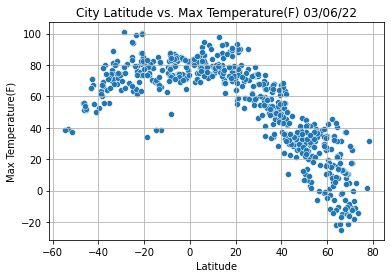

In [49]:
import seaborn as sns
sns.scatterplot(x=lats,y=max_temps)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title(f"City Latitude vs. Max Temperature(F) "+ time.strftime("%x"))
plt.grid(True)

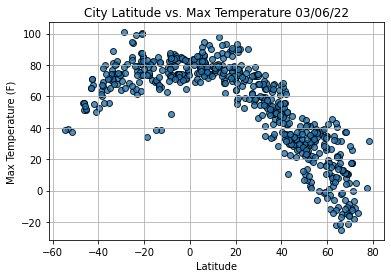

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# ---------Plot Latitude vs. Humidity

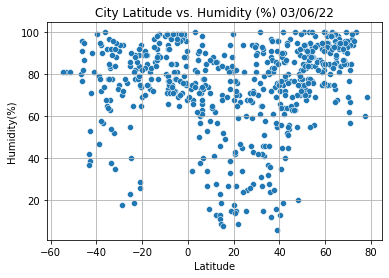

In [48]:
sns.scatterplot(x=lats, y=humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.grid(True)

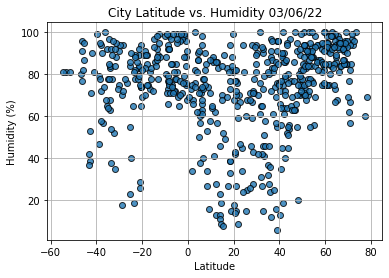

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# -----------Plot Latitude vs. Cloudiness-----

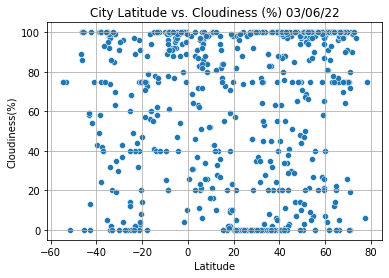

In [47]:
sns.scatterplot(x=lats, y=cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.grid(True)

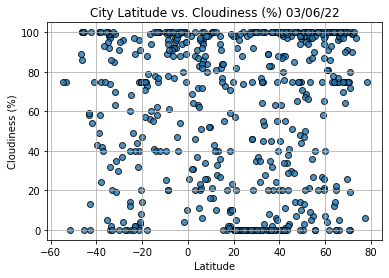

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# ----------Plot Latitude vs. Wind Speed------

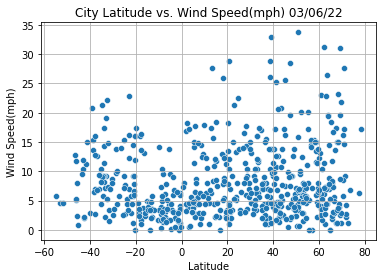

In [51]:
sns.scatterplot(x=lats, y=wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.grid(True)

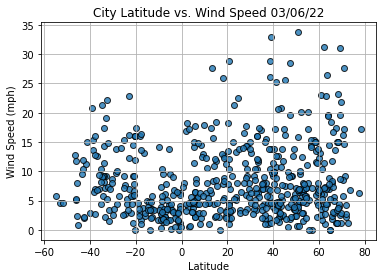

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()